### Introduction

To learn about possibillities of alignment analisys, take a look at [biopython](http://biopython.org/DIST/docs/tutorial/Tutorial.html). To start, [this](https://nbviewer.org/github/cgoliver/Notebooks/blob/master/COMP_364/L25/L25.ipynb) and [this](http://training.scicomp.jic.ac.uk/docs/phylogenetics_course_book/tree_building_excercises.html) tutorials can also be used.

To start the tests we search for HIV-1's gp120 [sequences](https://www.ncbi.nlm.nih.gov/nuccore/?term=hiv-1%20gp160). Here we use a selection of the 13312 sequences to perform the tests.

We also use [MAFFT](https://mafft.cbrc.jp/alignment/software/), [i-qtree](http://www.iqtree.org/doc/Tutorial) and [ETE Toolkit](http://etetoolkit.org/docs/latest/tutorial/tutorial_phylogeny.html) for visualization. Take a look at the [online version](https://www.genome.jp/tools-bin/ete).

We can later invetigate [protein structures](https://blog.jcharistech.com/2020/04/24/protein-sequence-analysis-of-covid19-using-biopython/).

#### Basic sequence handling

In [1]:
# import module to be used
from Bio import SeqIO

In [2]:
records = []
for record in SeqIO.parse("sequence.fasta", "fasta"):
    print(record.id)
    #print(record.name)
    print(record.description)
    records.append(record)

HE583229.1
HE583229.1
HE583264.1
HE583264.1
HE583260.1
HE583260.1
HE583255.1
HE583255.1
HE583251.1
HE583251.1
HE583249.1
HE583249.1
HE583245.1
HE583245.1


In [3]:
# one can also obtain sequences from NCBI
from Bio import Entrez

records[0].id

'HE583229.1'

In [4]:
handle = Entrez.efetch(db="nucleotide", id=records[0].id, retmode="xml")
seq = Entrez.read(handle)
seq

/home/rsilva/miniconda3/envs/hiv/lib/python3.9/site-packages/Bio/Entrez/__init__.py:658: UserWarning: 
Email address is not specified.

To make use of NCBI's E-utilities, NCBI requires you to specify your
email address with each request.  As an example, if your email address
is A.N.Other@example.com, you can specify it as follows:
   from Bio import Entrez
   Entrez.email = 'A.N.Other@example.com'
In case of excessive usage of the E-utilities, NCBI will attempt to contact
a user at the email address provided before blocking access to the
E-utilities.
  warnings.warn(


[{'GBSeq_locus': 'HE583229', 'GBSeq_length': '329', 'GBSeq_strandedness': 'double', 'GBSeq_moltype': 'DNA', 'GBSeq_topology': 'linear', 'GBSeq_division': 'VRL', 'GBSeq_update-date': '28-JAN-2013', 'GBSeq_create-date': '27-SEP-2012', 'GBSeq_definition': 'HIV-1 M:G_PT5236 vpu gene (partial) and gp160 gene (partial)', 'GBSeq_primary-accession': 'HE583229', 'GBSeq_accession-version': 'HE583229.1', 'GBSeq_other-seqids': ['emb|HE583229.1|', 'gi|407227845'], 'GBSeq_source': 'HIV-1 M:G_PT5236', 'GBSeq_organism': 'HIV-1 M:G_PT5236', 'GBSeq_taxonomy': 'Viruses; Riboviria; Pararnavirae; Artverviricota; Revtraviricetes; Ortervirales; Retroviridae; Orthoretrovirinae; Lentivirus', 'GBSeq_references': [{'GBReference_reference': '1', 'GBReference_position': '1..329', 'GBReference_authors': ['Freitas,F.B.', 'Esteves,A.', 'Piedade,J.', 'Parreira,R.'], 'GBReference_title': 'Novel multiregion hybridization assay for the identification of the most prevalent genetic forms of the human immunodeficiency virus

In [5]:
type(seq[0])

Bio.Entrez.Parser.DictionaryElement

In [6]:
seq[0].keys()

dict_keys(['GBSeq_locus', 'GBSeq_length', 'GBSeq_strandedness', 'GBSeq_moltype', 'GBSeq_topology', 'GBSeq_division', 'GBSeq_update-date', 'GBSeq_create-date', 'GBSeq_definition', 'GBSeq_primary-accession', 'GBSeq_accession-version', 'GBSeq_other-seqids', 'GBSeq_source', 'GBSeq_organism', 'GBSeq_taxonomy', 'GBSeq_references', 'GBSeq_feature-table', 'GBSeq_sequence'])

In [7]:
seq[0]['GBSeq_sequence']

'ttgatggaacaagagaaagagcacaagacagtggaaatgaaagcgagggggacacggaggaattggcaacccttgtggaaatgggggactttgatccttgggttggtgataatttgtagtgcctcaaataacttgtgggtcacagtctattatggggtacctgtgtgggaggatgcagataccactctattttgtgcatctgatgctaaagcatatagtactgaaagccataatatctgggctacacatgcctgtgtacccacagaccccaacccacaagagatatctctggataatgtaacagaaaattttaacatgtggaaaaaata'

In [8]:
from Bio.Seq import Seq

my_seq = Seq(seq[0]['GBSeq_sequence'])
my_seq.transcribe()

Seq('uugauggaacaagagaaagagcacaagacaguggaaaugaaagcgagggggaca...aua')

In [9]:
print(my_seq.transcribe())

uugauggaacaagagaaagagcacaagacaguggaaaugaaagcgagggggacacggaggaauuggcaacccuuguggaaaugggggacuuugauccuuggguuggugauaauuuguagugccucaaauaacuugugggucacagucuauuaugggguaccugugugggaggaugcagauaccacucuauuuugugcaucugaugcuaaagcauauaguacugaaagccauaauaucugggcuacacaugccuguguacccacagaccccaacccacaagagauaucucuggauaauguaacagaaaauuuuaacauguggaaaaaaua


In [10]:
# use a command line tool
!mafft sequence.fasta > seq_align.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 1 ambiguous characters.
    1 / 7
done.

Constructing a UPGMA tree (efffree=0) ... 
    0 / 7
done.

Progressive alignment 1/2... 
STEP     3 / 6 
Reallocating..done. *alloclen = 2086
STEP     6 / 6 
done.

Making a distance matrix from msa.. 
    0 / 7
done.

Constructing a UPGMA tree (efffree=1) ... 
    0 / 7
done.

Progressive alignment 2/2... 
STEP     4 / 6 
Reallocating..done. *alloclen = 2092
STEP     6 / 6 
done.

disttbfast (nuc) Version 7.490
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The de

In [11]:
!ls

environment.yml  seq_align.fasta       sequence.fasta
README.md	 sequence_align.ipynb


In [12]:
!iqtree -s seq_align.fasta

IQ-TREE multicore version 1.6.12 for Linux 64-bit built Mar 23 2020
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor,
Heiko Schmidt, Dominik Schrempf, Michael Woodhams.

Host:    jare (AVX2, FMA3, 15 GB RAM)
Command: iqtree -s seq_align.fasta
Seed:    558840 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Tue Nov  9 14:49:14 2021
Kernel:  AVX+FMA - 1 threads (4 CPU cores detected)

HINT: Use -nt option to specify number of threads because your CPU has 4 cores!
HINT: -nt AUTO will automatically determine the best number of threads to use.

Reading alignment file seq_align.fasta ... Fasta format detected
Alignment most likely contains DNA/RNA sequences
Alignment has 7 sequences with 563 columns, 177 distinct patterns
76 parsimony-informative, 100 singleton sites, 387 constant sites
            Gap/Ambiguity  Composition  p-value
   1  HE583229.1   41.56%    passed     57.80%
   2  HE583264.1    7.64%    passed     88.11%
   3  HE583260.1   51.69%    passed 

223  TIM3+F+I      1759.069     18  3554.138     3555.396     3632.137
224  TIM3+F+G4     1758.649     18  3553.299     3554.556     3631.298
225  TIM3+F+I+G4   1758.936     19  3555.872     3557.271     3638.204
226  TIM3+F+R2     1758.805     19  3555.609     3557.009     3637.942
227  TIM3+F+R3     1758.686     21  3559.371     3561.079     3650.370
235  TVMe          1792.463     15  3614.926     3615.804     3679.925
236  TVMe+I        1786.567     16  3605.135     3606.131     3674.467
237  TVMe+G4       1786.376     16  3604.752     3605.749     3674.085
238  TVMe+I+G4     1786.475     17  3606.950     3608.073     3680.615
239  TVMe+R2       1786.405     17  3606.809     3607.932     3680.475
240  TVMe+R3       1786.374     19  3610.749     3612.148     3693.081
248  TVM+F         1765.615     18  3567.230     3568.487     3645.229
249  TVM+F+I       1759.552     19  3557.103     3558.503     3639.435
250  TVM+F+G4      1759.109     19  3556.218     3557.617     3638.550
251  T

In [13]:
f = open('seq_align.fasta.treefile')
strtree = f.readline().strip()
f.close()

strtree

'(HE583229.1:0.0379699663,((HE583264.1:0.0092242687,HE583249.1:0.0656921460):0.0123473620,((HE583260.1:0.1598262821,HE583255.1:0.0525960179):0.1539001584,HE583251.1:0.0394046850):0.0671351983):0.0084399519,HE583245.1:0.0167209486);'

In [14]:
import PyQt5
from ete3 import PhyloTree, TreeStyle

t = PhyloTree(strtree)
print(t)


   /-HE583229.1
  |
  |      /-HE583264.1
  |   /-|
  |  |   \-HE583249.1
  |--|
--|  |      /-HE583260.1
  |  |   /-|
  |   \-|   \-HE583255.1
  |     |
  |      \-HE583251.1
  |
   \-HE583245.1


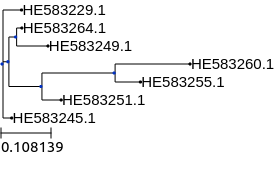

In [15]:
t.render("%%inline")

In [62]:
t.render("hiv-1_tree.pdf")

{'nodes': [[0.5, 62.5, 3.5, 65.5, 0, None],
  [20.056034419071423, 8.5, 23.056034419071423, 11.5, 1, None],
  [6.402349685564699, 60.25, 9.4023496855647, 63.25, 2, None],
  [14.111354285253654, 35.5, 17.111354285253654, 38.5, 3, None],
  [20.376345660501812, 26.5, 23.376345660501812, 29.5, 4, None],
  [46.48519110475681, 44.5, 49.48519110475681, 47.5, 5, None],
  [39.44340786116133, 85.0, 42.44340786116133, 88.0, 6, None],
  [112.60168635903884, 71.5, 115.60168635903884, 74.5, 7, None],
  [188.50000000000003, 62.5, 191.50000000000003, 65.5, 8, None],
  [138.92029251258816, 80.5, 141.92029251258816, 83.5, 9, None],
  [59.662802415005274, 98.5, 62.662802415005274, 101.5, 10, None],
  [10.231203836784132, 116.5, 13.231203836784132, 119.5, 11, None]],
 'faces': [[22.556034419071423,
   1.0,
   106.55603441907142,
   19.0,
   1,
   'HE583229.1'],
  [22.876345660501812, 19.0, 106.87634566050181, 37.0, 4, 'HE583264.1'],
  [48.98519110475681, 37.0, 132.9851911047568, 55.0, 5, 'HE583249.1'],
  

In [16]:
f = open('seq_align.fasta')
fasta_txt = []
for line in f:
    fasta_txt.append(line.strip())
f.close()
t.link_to_alignment(alignment='\n'.join(fasta_txt), alg_format="fasta")

In [17]:
print('\n'.join(fasta_txt))

>HE583229.1
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------ttgatggaacaagagaaagagcacaagacagtggaa
atgaaagcgagggggacacggaggaattggcaacccttgtggaaatgggggactttgatc
cttgggttggtgataatttgtagtgcctcaaataacttgtgggtcacagtctattatggg
gt--acctgtgtgggaggatgcagataccactctattttgtgcatctgatgctaaagcat
atagtactgaaagccataatatctgggctacacatgcctgtgtacccacagaccccaacc
cacaagagatatctctggataatgtaacagaaaattttaacatgtggaaaaaata-----
-----------------------
>HE583264.1
----------------------aaggatcatcaaaatcctgtaccaaagcagtaagtagt
aataactagtatatgtaatgcaacccttagaaatagctgcaatagtaggactaatagtag
cagtcatagcagccataattgtgtggatcatagtctttatacaatataaggaaataagaa
aacagaaagaaatacaaaggatacttgataaaataagagaaagagcagaagacagtggaa
atgagagcgaaggggacacagatgaattggcaacccttgtggagatgggggattttgatc
cttgggttggggataatttgtagtgcctcaaaggacttgtgggtcacagtctattatggg
gt--acctgtgtgggaagatgcagataccactctatt

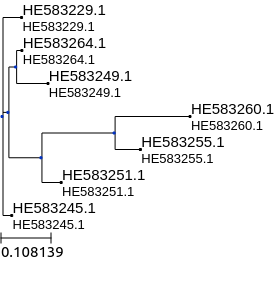

In [65]:
ts = TreeStyle()
t.render("%%inline", tree_style=ts)

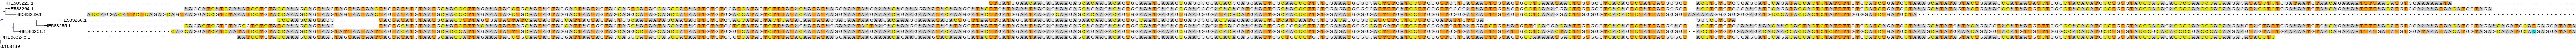

In [18]:
t.render("%%inline")

In [19]:
for leaf in t.iter_leaves():
    print(leaf.name, leaf.sequence)

HE583229.1 ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ttgatggaacaagagaaagagcacaagacagtggaaatgaaagcgagggggacacggaggaattggcaacccttgtggaaatgggggactttgatccttgggttggtgataatttgtagtgcctcaaataacttgtgggtcacagtctattatggggt--acctgtgtgggaggatgcagataccactctattttgtgcatctgatgctaaagcatatagtactgaaagccataatatctgggctacacatgcctgtgtacccacagaccccaacccacaagagatatctctggataatgtaacagaaaattttaacatgtggaaaaaata----------------------------
HE583264.1 ----------------------aaggatcatcaaaatcctgtaccaaagcagtaagtagtaataactagtatatgtaatgcaacccttagaaatagctgcaatagtaggactaatagtagcagtcatagcagccataattgtgtggatcatagtctttatacaatataaggaaataagaaaacagaaagaaatacaaaggatacttgataaaataagagaaagagcagaagacagtggaaatgagagcgaaggggacacagatgaattggcaacccttgtggagatgggggattttgatccttgggttggggataatttgtagtgcctcaaaggacttgtgggtcacagtctattatggggt--acctgtgtgggaagatgcagataccactctattttgtgcatctgatgcta